In [1]:
import os
import numpy as np
import random

from collections import defaultdict
from glob import glob
from matplotlib import pyplot as plt

import dlib
import cv2
import os


In [2]:
current_dir = os.getcwd()
file_names = []
face_classes = defaultdict(list)

# test_class = []
train_class = []
test_clas = []

train_matrix = []
# test_matrix = []
test_matri = []

index = 0


for student_folder in os.listdir(os.path.join(current_dir, 'Dataset_250')):
    student_folder_path = os.path.join(current_dir, 'Dataset_250', student_folder)

    file_name_pattern = os.path.join(student_folder_path, '*.jpg')
    file_name_list = glob(file_name_pattern)
    file_names.extend(file_name_list)
    

for i, image_path in enumerate(file_names):

    person_name = os.path.basename(os.path.dirname(image_path))

    current_face = plt.imread(image_path)
    image_shape = current_face.shape

    current_face = current_face.flatten()
    # if random.random() <= 0.25:
    #     # test_matrix.append(current_face)
    #     # test_class.append(person_name)
    #     test_matri.append(current_face)
    #     test_clas.append(person_name)
        
    #     continue

    face_classes[person_name].append(index)
    train_matrix.append(current_face)
    train_class.append(person_name)
    index += 1

test_matri = np.array(test_matri)
train_matrix = np.array(train_matrix)
original_train = np.array(train_matrix)
original_test = np.array(test_matri)


print(train_matrix.shape)
print(face_classes)




(496, 62500)
defaultdict(<class 'list'>, {'Abdissa Degefu': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'Abdurahman Muhammed': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'Abraham Wendmeneh': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'Amanuel Beyene': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'Amir Ahmedin': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'Ananiya Tesfahun': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 'Betelhem Yimam': [60, 61, 62, 63, 64, 65, 66, 67, 68, 69], 'Bethelhem Yemane': [70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 'Biniyam Haile': [80, 81, 82, 83, 84, 85, 86, 87, 88], 'Dagmawi Tensay': [89, 90, 91, 92, 93, 94, 95, 96, 97, 98], 'Dawit Abebe': [99, 100, 101, 102, 103, 104, 105, 106, 107, 108], 'Dawit Getahun': [109, 110, 111, 112, 113, 114, 115, 116, 117, 118], 'Deribew Shimels': [119, 120, 121, 122, 123, 124, 125, 126, 127, 128], 'Ephrem Shimels': [129, 130, 131, 132, 133, 134, 135, 136, 137, 138], 'Esayas Nigussie': [139, 140, 141, 142, 143, 144, 145, 146, 147, 148], 'Etsubdink Awoke

    **Step 1: Apply Principal Component Analysis(PCA) and Linear Discriminant Analysis(LDA)**
* As we can see from the above code block, `image_matrix`'s shape is very large. This implies higher dimension which makes computation difficult
* In order to avoid this overhead, we apply PCA and LDA so that dimensionality is reduced for easier calculation.


In [3]:
MEAN = np.mean(train_matrix, axis=0)
train_matrix = train_matrix - MEAN

# Compute the covariance
covariance = np.cov(train_matrix)
print(f"shape of covariance: {covariance.shape}")
# Compute the eigen pairs
_, selected_eigen = np.linalg.eigh(covariance)

# Project to eigen space
eigen_space = np.dot(selected_eigen.T, train_matrix) 
# Get the new dimension for train_matrix
train_matrix = np.dot(train_matrix, eigen_space.T)

print(f"shape of selected_eigen: {selected_eigen.shape}")
print(f"shape of eigen_space: {eigen_space.shape}")
print(f"shape of new train_matrix: {train_matrix.shape}")

*Visualizing the eigenspace*

In [ ]:
def show_images(vector_space):
    val = 0
    for j, i in enumerate(vector_space):
        if j < 39:
            continue
        img = random.choice(vector_space)
        if val >= 8:
            break
            
        plt.subplot(2, 4, val + 1)
        plt.imshow(img.reshape(image_shape), cmap='gray')
        val += 1
    
    plt.show()

show_images(eigen_space)

*Applying LDA*

In [ ]:
# Implementing Scatter Matrices
    # Scatter Within Matrix SW

def calculate_class_mean(class_name):
    mean_val = []
    for i in face_classes[class_name]:
        mean_val.append(train_matrix[i, :])
    
    return np.mean(np.array(mean_val), axis=0)

SW = np.zeros((len(train_matrix), len(train_matrix)))

for class_name, index in face_classes.items():
    face_mean = calculate_class_mean(class_name).reshape(-1, 1)
    for idx in index:
        image = train_matrix[idx, :].reshape(-1, 1)
        SW += np.dot(image - face_mean, (image - face_mean).T)
    
    
print(f"Scatter within matrix: \n {SW}")
    # print(40 * "-")


    # Scatter Between Matrix SB
        # -> Find global mean first
    
gloabl_mean = np.mean(train_matrix, axis=0)
SB = np.zeros((len(train_matrix), len(train_matrix)))

for class_name, index in face_classes.items():
    face_mean = calculate_class_mean(class_name).reshape(-1, 1)
    SB += (len(index) * np.dot(face_mean - gloabl_mean, (face_mean - gloabl_mean).T))
    
print(f"Scatter Between Matrix: \n {SB}")



        

Scatter within matrix: 
 [[ 3.17476346e-12  6.53184377e-12 -1.72258463e-12 ... -1.47842572e+03
   3.14679859e+03  1.39738347e+02]
 [ 6.53184377e-12  1.63756201e-11 -4.24328678e-12 ... -3.76165518e+03
   7.67679249e+03 -3.54696018e+02]
 [-1.72258463e-12 -4.24328678e-12  1.23515144e-12 ...  1.18784205e+03
  -2.32119724e+03  5.23732803e+01]
 ...
 [-1.47842572e+03 -3.76165518e+03  1.18784205e+03 ...  6.81326723e+18
  -1.90692010e+18 -2.85960742e+17]
 [ 3.14679859e+03  7.67679249e+03 -2.32119724e+03 ... -1.90692010e+18
   1.32959513e+19  8.64583584e+17]
 [ 1.39738347e+02 -3.54696018e+02  5.23732803e+01 ... -2.85960742e+17
   8.64583584e+17  1.67868744e+19]]
Scatter Between Matrix: 
 [[ 5.80558139e-09  1.49469626e-08 -3.89814026e-09 ... -3.31428471e+06
   2.70785939e+06  9.61148776e+05]
 [ 1.49469626e-08  3.89666026e-08 -1.01684464e-08 ... -8.46543410e+06
   7.31256452e+06  2.68789287e+06]
 [-3.89814026e-09 -1.01684464e-08  2.72136813e-09 ...  2.32987073e+06
  -2.92228445e+06 -1.26812818e+06

    **Step 3: Calculate the Eigenvectors and Corresponding Eigenvalues for the Scatter matrices**

In [ ]:
unrefined_eigen = np.dot(np.linalg.inv(SW.T), SB.T)
svd = np.linalg.svd(unrefined_eigen)

eig_val, eig_vec = svd[1], svd[0]
eig_val = np.abs(eig_val)
eigen_pairs = sorted([(eig_val[i], eig_vec[:, i]) for i in range(len(eig_val))], key=lambda x: x[0], reverse=True)

for i in eigen_pairs:
    print(i[0])

4.252121459711695e+33
1.6793557794894502e+33
1.3316434121841193e+32
8.418869252583941e+31
4.6322888613057175e+31
2.2028819939576685e+31
1.1600450387132063e+31
5.827914216104937e+30
3.77377382333669e+30
1.8577047930798418e+30
1.5096290148438862e+30
2.1916737978508768e+29
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.489333349629529e+17
3.4

In [ ]:
eigv_sum = sum(eig_val)
cumsum = eig_val.cumsum()

for i, j in enumerate(cumsum):
    print('Eigen value {0:}: {1: .2%}'.format(i + 1, (j / eigv_sum).real))

Eigen value 1:  68.12%
Eigen value 2:  95.03%
Eigen value 3:  97.16%
Eigen value 4:  98.51%
Eigen value 5:  99.25%
Eigen value 6:  99.60%
Eigen value 7:  99.79%
Eigen value 8:  99.88%
Eigen value 9:  99.94%
Eigen value 10:  99.97%
Eigen value 11:  100.00%
Eigen value 12:  100.00%
Eigen value 13:  100.00%
Eigen value 14:  100.00%
Eigen value 15:  100.00%
Eigen value 16:  100.00%
Eigen value 17:  100.00%
Eigen value 18:  100.00%
Eigen value 19:  100.00%
Eigen value 20:  100.00%
Eigen value 21:  100.00%
Eigen value 22:  100.00%
Eigen value 23:  100.00%
Eigen value 24:  100.00%
Eigen value 25:  100.00%
Eigen value 26:  100.00%
Eigen value 27:  100.00%
Eigen value 28:  100.00%
Eigen value 29:  100.00%
Eigen value 30:  100.00%
Eigen value 31:  100.00%
Eigen value 32:  100.00%
Eigen value 33:  100.00%
Eigen value 34:  100.00%
Eigen value 35:  100.00%
Eigen value 36:  100.00%
Eigen value 37:  100.00%
Eigen value 38:  100.00%
Eigen value 39:  100.00%
Eigen value 40:  100.00%
Eigen value 41:  10

    **Step 6: Use the selected eigenvectors to create the projected space**

In [ ]:
k = 2
chosen_eigen = np.array([i[1] for i in eigen_pairs])

projection_space = np.dot(train_matrix, chosen_eigen.T)

projection_space.shape

(496, 496)

    **Step 7: Test**

***Testing with Train-test-split Data***

In [ ]:
# test_matri = test_matri - MEAN
# # Apply PCA
# test_matri = np.dot(test_matri, eigen_space.T)

# # Apply LDA
# test_matri = np.dot(test_matri, chosen_eigen.T)

# test_matri.shape



In [ ]:
# from collections import Counter

# test_index = 0
# correct = 0

# for test_face in test_matri:
#     difference = projection_space - test_face
#     euclidean_distance = list(np.linalg.norm(difference, axis=1))

#     arranged_distance = [*euclidean_distance]
#     arranged_distance.sort()
    
#     neighbors = 1
#     selected = arranged_distance[: neighbors]
#     selected_label = [train_class[euclidean_distance.index(neighbor)] for neighbor in selected]
    
#     label_count = Counter(selected_label)
#     predicted_name = max(label_count, key=label_count.get)
#     actual_name = test_clas[test_index]
    
    
#     if random.random() <= 0.05:
#         fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(4, 2))
#         axes[0].imshow(original_test[test_index].reshape(image_shape),cmap='gray')
#         axes[0].set_title('Evaluated Face')
#         axes[1].imshow(original_train[face_classes[predicted_name][0]].reshape(image_shape), cmap='gray')
#         axes[1].set_title('Best Match')
    
#         plt.show()
#     if predicted_name == actual_name:
#         correct += 1
#     test_index += 1
    

# print('{0:.2%}'.format(correct / (test_index + 1)) )

***Testing with images captured in different times***

In [ ]:
test_dir = os.getcwd()
test_names = []
test_classes = defaultdict(list)

test_class = []
test_matrix = []
index = 0

for student_folder in os.listdir(os.path.join(test_dir, 'testfinal')):
    student_folder_path = os.path.join(test_dir, 'testfinal', student_folder)

    test_name_pattern = os.path.join(student_folder_path, '*.jpg')
    test_name_list = glob(test_name_pattern)
    test_names.extend(test_name_list)

for i, image_path in enumerate(test_names):

    person_name = os.path.basename(os.path.dirname(image_path))

    current_face = plt.imread(image_path)
    image_shape = current_face.shape

    current_face = current_face.flatten()

    test_classes[person_name].append(index)
    test_matrix.append(current_face)
    test_class.append(person_name)
    index += 1

test_matrix = np.array(test_matrix)
original_test = np.array(test_matrix)

print(test_matrix.shape)
print(test_classes)


(61, 62500)
defaultdict(<class 'list'>, {'Abraham Wendmeneh': [0], 'Amanuel Beyene': [1], 'Amir Ahmedin': [2, 3], 'Ananiya Tesfahun': [4, 5], 'Betelhem Yimam': [6, 7], 'Bethelhem Yemane': [8], 'Biniyam Haile': [9], 'Dagmawi_tensay': [10, 11], 'Dawit Getahun': [12, 13], 'Derbew_shimels': [14, 15], 'Ephrem_shimels': [16, 17], 'Esayas Nigussie': [18, 19], 'Etsubdink Awoke': [20, 21], 'Fasika_fikadu': [22, 23], 'Fraol Mulugeta': [24], 'Gedion Ezra': [25], 'Geleta Daba': [26, 27], 'Gelila Moges': [28], 'Gelila Tefera': [29], 'Kidus Hunegnaw': [30], 'Leul Degarege': [31, 32], 'Mariam Yohannes': [33, 34], 'Melkishi Tesfaye': [35], 'Metsakal Zeleke': [36, 37], 'Milion Tolesa': [38], 'Milka Fasika': [39], 'Naol Taye': [40, 41], 'Olyad Temesgen': [42, 43], 'Sahib Semahegn': [44, 45], 'Shemsu Nurye': [46, 47], 'Sosina Esayas': [48], 'Tiruzer Tsedeke': [49], 'Yanet Mekuria': [50], 'Yohannes Ahunm': [51], 'Yohannes Dessie': [52, 53], 'Yohannes Desta': [54], 'Yonas Engedu': [55, 56], 'Yosef Aweke': 

In [ ]:

test_matrix = test_matrix - MEAN
# Apply PCA
test_matrix = np.dot(test_matrix, eigen_space.T)

# Apply LDA
test_matrix = np.dot(test_matrix, chosen_eigen.T)

test_matrix.shape



(61, 496)

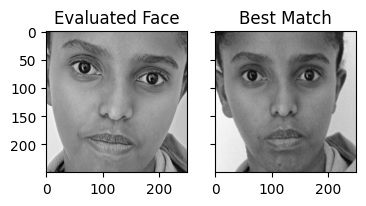

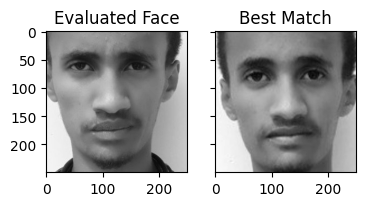

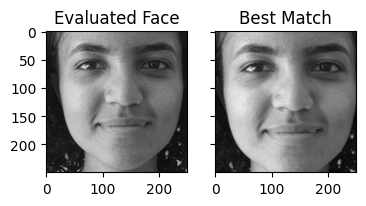

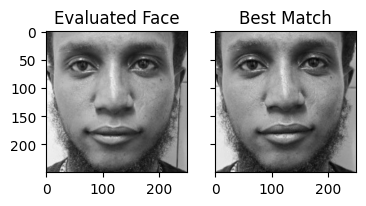

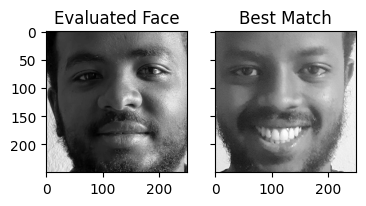

38.71%


In [ ]:
from collections import Counter

test_index = 0
correct = 0

for test_face in test_matrix:
    difference = projection_space - test_face
    euclidean_distance = list(np.linalg.norm(difference, axis=1))

    arranged_distance = [*euclidean_distance]
    arranged_distance.sort()
    
    neighbors = 1
    selected = arranged_distance[: neighbors]
    selected_label = [train_class[euclidean_distance.index(neighbor)] for neighbor in selected]
    
    label_count = Counter(selected_label)
    predicted_name = max(label_count, key=label_count.get)
    actual_name = test_class[test_index]
    
    
    if random.random() <= 0.05:
        fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(4, 2))
        axes[0].imshow(original_test[test_index].reshape(image_shape),cmap='gray')
        axes[0].set_title('Evaluated Face')
        axes[1].imshow(original_train[face_classes[predicted_name][0]].reshape(image_shape), cmap='gray')
        axes[1].set_title('Best Match')
    
        plt.show()
    if predicted_name == actual_name:
        correct += 1
    test_index += 1
    

print('{0:.2%}'.format(correct / (test_index + 1)) )

***Testing with real-time group photos***

In [ ]:

def detect_and_save_faces(input_image_path, output_folder, n=250):
   
    detector = dlib.get_frontal_face_detector()

    image = cv2.imread(input_image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    os.makedirs(output_folder, exist_ok=True)    
    for i, face in enumerate(faces):
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        face_image = image[y:y+h, x:x+w]

                                
        resized_face = cv2.resize(face_image, (n, n))
        grayscale_face = cv2.cvtColor(resized_face, cv2.COLOR_BGR2GRAY)

        output_filename = os.path.join(output_folder, f'{i}.jpg')
        cv2.imwrite(output_filename, grayscale_face)
        print(f'Saved resized and grayscale face  {output_filename}')


input_im = 'grp.jpg'
output_detected_faces_folder = f'./test{input_im}'


# Perform face detection and saving
detect_and_save_faces(input_im, output_detected_faces_folder, 250)


Saved resized and grayscale face  ./testgrp.jpg\0.jpg
Saved resized and grayscale face  ./testgrp.jpg\1.jpg
Saved resized and grayscale face  ./testgrp.jpg\2.jpg


In [ ]:


def find_diff(file_path, actual):
    test = plt.imread(file_path)
    test = test.flatten()
    
    # Assuming MEAN, eigen_space, chosen_eigen, projection_space, and train_class are defined somewhere
    
    test = test - MEAN
    test = np.dot(test, eigen_space.T)
    test = np.dot(test, chosen_eigen.T)
    
    diff = projection_space - test
    ed = list(np.linalg.norm(diff, axis=1))
    
    ad = [*ed]
    ad.sort()
    
    n = 10
    s = ad[:n]
    
    sl = [train_class[ed.index(neighbor)] for neighbor in s]

    lc = Counter(sl)
    pn = max(lc, key=lc.get)
    an = actual 
    
    print("Prediction:", pn)
    return pn
    
    # print("Actual:", an)

# Path to the directory containing images
directory_path = os.getcwd() + "/testgrp.jpg"

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".jpg"):
        file_path = os.path.join(directory_path, filename)
        actual = "Yanet"  # You might need to determine the actual label based on the file or directory name
        find_diff(file_path, actual)


NameError: name 'MEAN' is not defined